In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
import sys
sys.path.insert(1, '../scripts/')
import data_munging_tools as dmt
import utils

In [174]:
# Load the dataframes
test_df = pd.read_csv('../data/cleaned-input.test.tsv', sep='\t', low_memory=False)
train_df = pd.read_csv('../data/cleaned-input.training.tsv', sep='\t', low_memory=False)

blacklist_patterns = ['^recent_ipt_', '^production_']

test_df.shape

whitelist = ['production_liquid_180']

In [175]:
train_df.stimulated_formation.value_counts()

bakken                3987
three forks           1617
spearfish               85
pronghorn                7
madison                  4
tyler                    3
bakken,three forks       2
red river                2
bakken/three forks       1
nesson                   1
lodgepole                1
bakken,pronghorn         1
bluell                   1
scallion                 1
Name: stimulated_formation, dtype: int64

In [176]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [194]:
def munge_pipe(df, blacklist_patterns=[], exceptions={}, null_cutoff=.05):
    '''
    parameters: dataframe, blacklist patterns (as list), exceptions to blacklist patterns
        (as set)
    returns: copy of munged dataframe
    '''
    print(f"df shape before removals {df.shape}")
    
    df = (df.copy()
            .rename(columns=str.lower)
            .set_index("api")
            .pipe(dmt.drop_blacklist, blacklist_patterns=blacklist_patterns, exceptions=whitelist)
            .pipe(dmt.drop_high_cardinality, exceptions=exceptions)
            .pipe(dmt.drop_high_nulls, exceptions=exceptions, cutoff=null_cutoff)
            .select_dtypes("number")
            .assign(length=lambda x: distance(x["surface_lat"], x["surface_lng"], x["bh_lat"], x["bh_lng"]))
#             .query("length > ")
            )
    
    print (f"df shape after removals {df.shape}")
    return df

In [190]:
munged_df = munge_pipe(train_df, blacklist_patterns=blacklist_patterns, null_cutoff=0.5)

df shape before removals (6529, 53)
Number of columns dropped for blacklist_pattern: 0
Shape before cardinality removal: (6529, 43)
Shape after cardinality removal: (6529, 35)
Shape before high null removal: (6529, 35)
Shape before high null removal: (6529, 34)
df shape after removals (6529, 21)


In [191]:
munged_df.head()

,grelev,kbelev,section,td,bakken_isopach_ft,bh_lat,bh_lng,legs,max_tvd,mean_tvd,...,num_pools_produced,production_liquid_180,std_tvd,surface_lat,surface_lng,total_lbs_proppant,total_num_stages,total_volume_bbls,tvd,length
fileno,,,,,,,,,,,,,,,,,,,,,
27863,NaN,NaN,23,20300.0,90.0,48.168154,-103.245166,2.0,10916.93,10868.577339,...,1,48302.0,98.015839,48.142413,-103.240896,3991618.0,20,90232.0,10896.84,15209.710646
20136,2216.0,2238.0,1,20552.0,50.0,47.906679,-103.802227,2.0,10784.08,10724.267533,...,1,58729.0,131.742252,47.934285,-103.802089,3668254.0,38,69347.0,10774.50,16213.011546
25780,2219.0,2247.0,30,16980.0,110.0,48.205268,-102.422482,2.0,9915.74,9830.268200,...,1,17221.0,144.805008,48.224994,-102.431774,3046163.0,46,46463.0,9906.50,12142.523957
24575,2573.0,2600.0,30,20135.0,40.0,46.891498,-102.967185,2.0,10305.91,10242.205128,...,1,44904.0,104.832581,46.918980,-102.969390,4811400.0,30,55196.0,10260.21,16164.423799
22752,2287.0,2317.0,34,19400.0,90.0,48.225065,-102.380393,2.0,9743.69,9706.356736,...,1,104497.0,87.433502,48.199037,-102.369400,NaN,30,NaN,9726.07,15880.180407


In [193]:
munged_df.section

fileno
27863    23
20136     1
25780    30
24575    30
22752    34
         ..
19319    25
27541    27
24573    25
23049    26
21534     3
Name: section, Length: 6529, dtype: int64

In [165]:
munged_df.legs.value_counts()

2.0    5148
3.0     819
4.0     170
5.0      35
1.0      11
6.0       9
7.0       3
9.0       1
Name: legs, dtype: int64

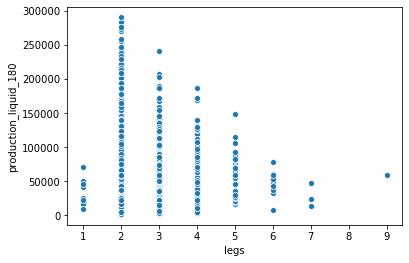

In [167]:
sns.scatterplot(data=munged_df, x="legs", y="production_liquid_180")

In [172]:
munged_df.shape[0]

6529

In [173]:
train_df.FileNo.nunique()

6529

In [135]:
munged_df.head()

,FileNo,GRElev,KBElev,Section,TD,bakken_isopach_ft,bh_lat,bh_lng,legs,max_tvd,...,min_tvd,num_pools_produced,std_tvd,surface_lat,surface_lng,total_lbs_proppant,total_num_stages,total_volume_bbls,tvd,length
0,27863,NaN,NaN,23,20300.0,90.0,48.168154,-103.245166,2.0,10916.93,...,10395.89,1,98.015839,48.142413,-103.240896,3991618.0,20,90232.0,10896.84,15209.710646
1,20136,2216.0,2238.0,1,20552.0,50.0,47.906679,-103.802227,2.0,10784.08,...,10142.28,1,131.742252,47.934285,-103.802089,3668254.0,38,69347.0,10774.50,16213.011546
2,25780,2219.0,2247.0,30,16980.0,110.0,48.205268,-102.422482,2.0,9915.74,...,9198.87,1,144.805008,48.224994,-102.431774,3046163.0,46,46463.0,9906.50,12142.523957
3,24575,2573.0,2600.0,30,20135.0,40.0,46.891498,-102.967185,2.0,10305.91,...,9741.01,1,104.832581,46.918980,-102.969390,4811400.0,30,55196.0,10260.21,16164.423799
4,22752,2287.0,2317.0,34,19400.0,90.0,48.225065,-102.380393,2.0,9743.69,...,9269.02,1,87.433502,48.199037,-102.369400,NaN,30,NaN,9726.07,15880.180407


In [118]:
munged_df.columns

Index(['FileNo', 'GRElev', 'KBElev', 'Section', 'TD', 'bakken_isopach_ft',
       'bh_lat', 'bh_lng', 'legs', 'max_tvd', 'mean_tvd', 'min_tvd',
       'num_pools_produced', 'std_tvd', 'surface_lat', 'surface_lng',
       'total_lbs_proppant', 'total_num_stages', 'total_volume_bbls', 'tvd',
       'length'],
      dtype='object')

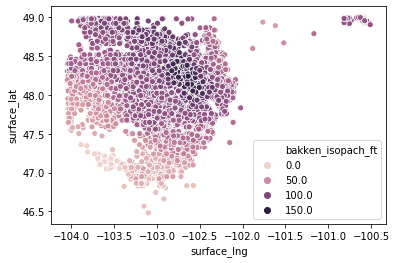

In [125]:
sns.scatterplot(data=munged_df, x="surface_lng", y="surface_lat", hue="bakken_isopach_ft")

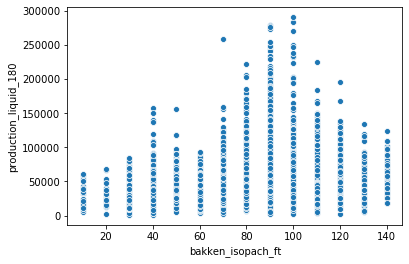

In [128]:
sns.scatterplot(data=train_df, y="production_liquid_180", x="bakken_isopach_ft")

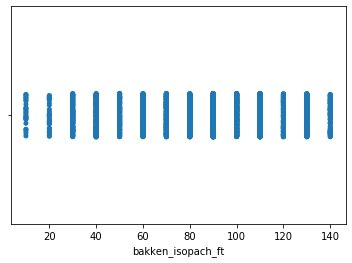

In [124]:
sns.stripplot(data=munged_df, x="bakken_isopach_ft")

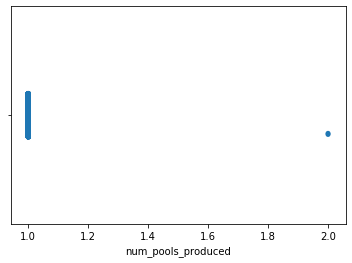

In [121]:
sns.stripplot(data=munged_df, x="num_pools_produced")

In [80]:
for col in munged_df.select_dtypes("O").columns:
    display(munged_df.filter([col]).squeeze().value_counts())

MCKENZIE     1796
MOUNTRAIL    1605
WILLIAMS     1081
DUNN         1078
OTHER         537
DIVIDE        432
Name: CountyName, dtype: int64

OTHER                              3425
WHITING OIL AND GAS CORPORATION     867
CONTINENTAL RESOURCES, INC.         752
HESS BAKKEN INVESTMENTS II, LLC     640
XTO ENERGY INC.                     431
EOG RESOURCES, INC.                 414
Name: CurrentOperator, dtype: int64

OTHER           5402
SANISH           395
PARSHALL         264
ALGER            197
MURPHY CREEK     144
VAN HOOK         127
Name: FieldName, dtype: int64

OTHER                              3910
CONTINENTAL RESOURCES, INC.         722
WHITING OIL AND GAS CORPORATION     595
HESS CORPORATION                    523
EOG RESOURCES, INC.                 414
MARATHON OIL COMPANY                365
Name: OriginalOperator, dtype: int64

BAKKEN    6310
OTHER      208
Name: ProducedPools, dtype: int64

OTHER    2887
SWSE      919
SESE      761
SESW      739
NENW      628
NWNE      595
Name: QQ, dtype: int64

OTHER    3408
95 W      740
92 W      670
96 W      583
99 W      576
93 W      552
Name: Range, dtype: int64

OTHER    3681
152 N     661
153 N     588
155 N     540
154 N     531
151 N     528
Name: Township, dtype: int64

A        6248
IA        250
OTHER      31
Name: WellStatus, dtype: int64

OG    6529
Name: WellType, dtype: int64

HORIZONTAL    6519
OTHER           10
Name: Wellbore, dtype: int64

OTHER    3690
48/64     533
24/64     524
32/64     494
20/64     338
28/64     327
Name: choke_size, dtype: int64

bakken         3987
three forks    1617
OTHER           109
Name: stimulated_formation, dtype: int64

sand frac    4618
other         622
fracture      158
OTHER           9
Name: type_treatment, dtype: int64

In [24]:
train_df.stimulated_formation.value_counts()

bakken                3987
three forks           1617
spearfish               85
pronghorn                7
madison                  4
tyler                    3
bakken,three forks       2
red river                2
bakken/three forks       1
nesson                   1
lodgepole                1
bakken,pronghorn         1
bluell                   1
scallion                 1
Name: stimulated_formation, dtype: int64

In [25]:
munged_df.stimulated_formation.value_counts()

bakken         3987
three forks    1617
OTHER           109
Name: stimulated_formation, dtype: int64

In [30]:
import seaborn as sns

In [59]:
plot_df = (munged_df.copy()
               .filter(["stimulated_formation", 'bh_lat', 'bh_lng', 'max_tvd', 'mean_tvd', 'min_tvd'])
               .assign(tvd_min_max_range=lambda x: x["max_tvd"] - x["min_tvd"],
                       tvd_mean_max_range=lambda x: x["max_tvd"] - x["mean_tvd"],
                       tvd_mean_min_range=lambda x: x["mean_tvd"] - x["min_tvd"],
                      )
#                .query("mean_tvd > 6000")
            )
                   

In [85]:
train_df.Wellbore.value_counts()

HORIZONTAL             6519
HORIZONTAL RE-ENTRY       6
DIRECTIONAL               4
Name: Wellbore, dtype: int64

In [83]:
train_df.WellType.value_counts()

OG    6529
Name: WellType, dtype: int64

In [86]:
import geopy.distance

ModuleNotFoundError: No module named 'geopy'

In [104]:
train_df.columns

Index(['FileNo', 'CountyName', 'CurrentOperator', 'CurrentWellName', 'DFElev',
       'FieldName', 'Footages', 'GRElev', 'KBElev', 'LeaseName', 'LeaseNumber',
       'OriginalOperator', 'OriginalWellName', 'ProducedPools', 'QQ', 'Range',
       'Section', 'TD', 'Township', 'WellStatus', 'WellType', 'Wellbore',
       'api', 'bakken_isopach_ft', 'bh_lat', 'bh_lng', 'choke_size', 'legs',
       'max_tvd', 'mean_tvd', 'min_tvd', 'num_pools_produced',
       'production_liquid_120', 'production_liquid_150',
       'production_liquid_180', 'production_liquid_1825',
       'production_liquid_270', 'production_liquid_30',
       'production_liquid_365', 'production_liquid_60',
       'production_liquid_730', 'production_liquid_90', 'spud_date', 'std_tvd',
       'stimulated_formation', 'surface_lat', 'surface_lng',
       'total_lbs_proppant', 'total_num_stages', 'total_volume_bbls', 'tvd',
       'type_treatment', 'well_status_date'],
      dtype='object')

In [105]:
munged_df = munged_df

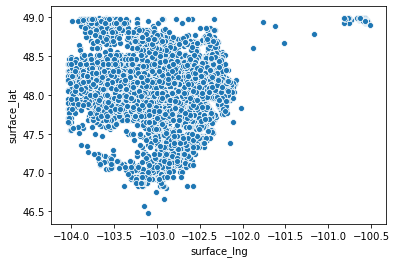

In [107]:
sns.scatterplot(data=munged_df, y="surface_lat", x="surface_lng")

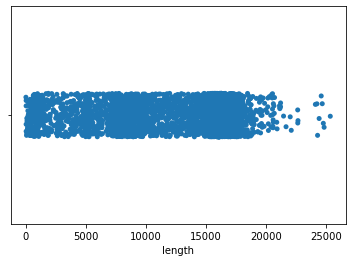

In [108]:
sns.stripplot(data=munged_df, x="length")

In [109]:
munged_df.columns

Index(['FileNo', 'CountyName', 'CurrentOperator', 'FieldName', 'GRElev',
       'KBElev', 'OriginalOperator', 'ProducedPools', 'QQ', 'Range', 'Section',
       'TD', 'Township', 'WellStatus', 'WellType', 'Wellbore',
       'bakken_isopach_ft', 'bh_lat', 'bh_lng', 'choke_size', 'legs',
       'max_tvd', 'mean_tvd', 'min_tvd', 'num_pools_produced', 'std_tvd',
       'stimulated_formation', 'surface_lat', 'surface_lng',
       'total_lbs_proppant', 'total_num_stages', 'total_volume_bbls', 'tvd',
       'type_treatment', 'length'],
      dtype='object')

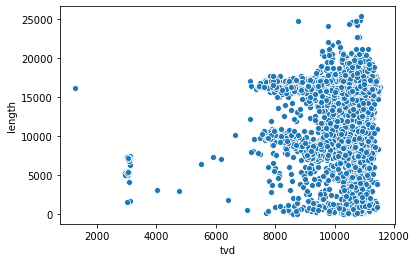

In [111]:
sns.scatterplot(data=munged_df, x="tvd", y="length")

In [97]:
munged_df = munged_df.assign(haversine=lambda x: haversine(x["surface_lat"], x["surface_lng"], x["bh_lat"], x["bh_lng"]))

TypeError: cannot convert the series to <class 'float'>

In [ ]:


coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print geopy.distance.vincenty(coords_1, coords_2).km

,stimulated_formation,bh_lat,bh_lng,max_tvd,mean_tvd,min_tvd,tvd_min_max_range,tvd_mean_max_range,tvd_mean_min_range
0,bakken,48.168154,-103.245166,10916.93,10868.577339,10395.89,521.04,48.352661,472.687339
1,bakken,47.906679,-103.802227,10784.08,10724.267533,10142.28,641.80,59.812467,581.987532
2,three forks,48.205268,-102.422482,9915.74,9830.268200,9198.87,716.87,85.471800,631.398200
3,bakken,46.891498,-102.967185,10305.91,10242.205128,9741.01,564.90,63.704872,501.195128
4,bakken,48.225065,-102.380393,9743.69,9706.356736,9269.02,474.67,37.333264,437.336736


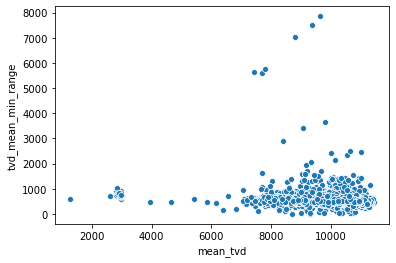

In [63]:
sns.scatterplot(data=plot_df, x="mean_tvd", y="tvd_mean_min_range")

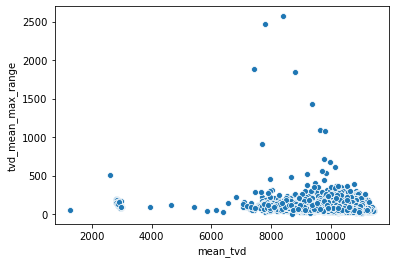

In [64]:
sns.scatterplot(data=plot_df, x="mean_tvd", y="tvd_mean_max_range")

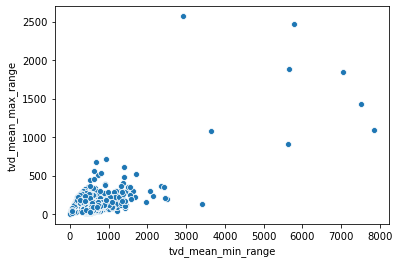

In [68]:
sns.scatterplot(data=plot_df, x="tvd_mean_min_range", y="tvd_mean_max_range")

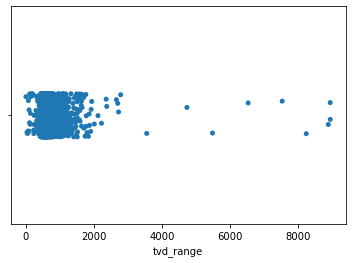

In [51]:
sns.stripplot(data=plot_df, x="tvd_range")

In [44]:
munged_df.shape

(6529, 34)

In [45]:
plot_df.shape

(6119, 7)

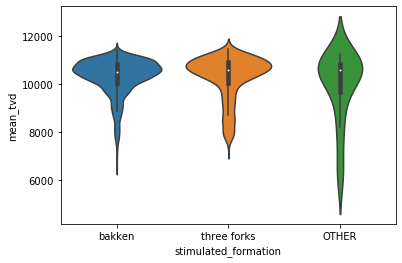

In [46]:
sns.violinplot(data=plot_df, x="stimulated_formation", y="mean_tvd")

In [28]:
munged_df.filter(["stimulated_formation", "mean_tvd"])

,stimulated_formation,mean_tvd
0,bakken,10868.577339
1,bakken,10724.267533
2,three forks,9830.268200
3,bakken,10242.205128
4,bakken,9706.356736
5,bakken,10271.044725
6,bakken,10804.180300
7,bakken,10910.599879
8,bakken,11110.017742
9,bakken,9909.697687


In [13]:
train_df = munge_pipe(train_df, blacklist_patterns=my_blacklist_patterns, exceptions=set([TARGET_1]), null_cutoff=.18)

df shape before removals (6529, 48)
Shape before blacklist removal: (6529, 48)
Blacklisted columns: ['bakken_isopach_ft', 'production_liquid_120', 'production_liquid_150', 'production_liquid_180', 'production_liquid_1825', 'production_liquid_270', 'production_liquid_30', 'production_liquid_365', 'production_liquid_60', 'production_liquid_730', 'total_num_stages']
Number of blacklisted columns: 11
Shape after blacklist removal: (6529, 37)
**************************************************
Shape before cardinality removal: (6529, 37)
Dropped CurrentWellName since it was categorical and had a high cardinality
Dropped Footages since it was categorical and had a high cardinality
Dropped LeaseName since it was categorical and had a high cardinality
Dropped LeaseNumber since it was categorical and had a high cardinality
Dropped OriginalWellName since it was categorical and had a high cardinality
Shape after cardinality removal: (6529, 32)
**************************************************
Sha

In [14]:
test_df = munge_pipe(test_df, blacklist_patterns=my_blacklist_patterns, exceptions=set([TARGET_1]), null_cutoff=.18)

df shape before removals (1586, 48)
Shape before blacklist removal: (1586, 48)
Blacklisted columns: ['bakken_isopach_ft', 'production_liquid_120', 'production_liquid_150', 'production_liquid_180', 'production_liquid_1825', 'production_liquid_270', 'production_liquid_30', 'production_liquid_365', 'production_liquid_60', 'production_liquid_730', 'total_num_stages']
Number of blacklisted columns: 11
Shape after blacklist removal: (1586, 37)
**************************************************
Shape before cardinality removal: (1586, 37)
Dropped CurrentWellName since it was categorical and had a high cardinality
Dropped DFElev since it was empty
Dropped Footages since it was categorical and had a high cardinality
Dropped LeaseName since it was categorical and had a high cardinality
Dropped LeaseNumber since it was categorical and had a high cardinality
Dropped OriginalWellName since it was categorical and had a high cardinality
Shape after cardinality removal: (1586, 31)
********************

### Split

In [15]:
print train_df.shape

(6529, 31)


In [16]:
print test_df.shape

(1586, 31)


In [17]:
test_df[TARGET_1].isnull().sum()

28

In [18]:
train_df[TARGET_1].isnull().sum()

133

In [ ]:
# Build Models

etr = ExtraTreesRegressor(n_estimators=TREE_COUNT, max_depth=MAX_DEPTH, n_jobs=-1)

etr.fit(rejoined_train_df, y_train)

### Imputation

In [109]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, SimpleFill, MICE, MatrixFactorization, IterativeSVD

### GBT

In [175]:
from sklearn.ensemble import GradientBoostingRegressor

In [191]:
grid.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_split': 3,
 'n_estimators': 1000,
 'subsample': 0.6}

In [199]:
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 7,
 'min_samples_split': 3,
 'n_estimators': 2000,
 'subsample': 0.7}

In [200]:
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=2000, subsample = .7, max_depth =7, min_samples_split= 3, random_state=1984)

In [201]:
gbr.fit(rejoined_train_df, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=2000, presort='auto', random_state=1984,
             subsample=0.7, verbose=0, warm_start=False)

In [202]:
gbr.score(rejoined_test_df, y_test)

0.6266726640775433

In [196]:
gbr.score(rejoined_test_df, y_test)

0.61430816909047947

In [197]:
from sklearn.model_selection import GridSearchCV

gbr2 = GradientBoostingRegressor(random_state=1984)

params = {"learning_rate": [.001, .01, .05], "n_estimators": [1000, 2000], "max_depth": [3, 5, 7], "min_samples_split": [3, 4], "subsample": [.5, .6, .7]}

grid = GridSearchCV(estimator=gbr2,param_grid=params, n_jobs=-1)


In [198]:
grid.fit(rejoined_train_df, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1984,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000, 2000], 'min_samples_split': [3, 4], 'learning_rate': [0.001, 0.01, 0.05], 'max_depth': [3, 5, 7], 'subsample': [0.5, 0.6, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

## Model Evaluation

In [ ]:
etr.score(X_test, y_test)

In [ ]:
mft.eval_model(etr, X_test, y_test, y_train)

In [ ]:
mft.eval_model(gbr, X_test, y_test, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

### Feature Importances

In [ ]:
feature_array = np.array(X_train.columns)

In [ ]:
models = [etr, gbr]

In [ ]:
mft.most_important_features(etr, feature_array)

In [ ]:
mft.most_important_features(gbr, feature_array)

In [ ]:
#whoops, index is still in there